In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cryptovision.dataset as dataset

2025-02-14 09:45:18.942 | INFO     | cryptovision.config:<module>:15 - PROJ_ROOT path is: /Users/leonardo/Documents/Projects/cryptovision


In [2]:
df = dataset.main(min_samples=90, verbose=False)

2025-02-14 09:45:19.694 | INFO     | cryptovision.dataset:main:43 - Processing sjb dataset
2025-02-14 09:45:19.744 | INFO     | cryptovision.dataset:main:43 - Processing scls dataset
2025-02-14 09:45:19.751 | INFO     | cryptovision.dataset:main:43 - Processing lirs dataset
2025-02-14 09:45:19.756 | INFO     | cryptovision.dataset:main:43 - Processing cbc dataset
2025-02-14 09:45:19.770 | INFO     | cryptovision.dataset:main:43 - Processing web dataset
2025-02-14 09:45:19.792 | INFO     | cryptovision.dataset:main:43 - Processing inat dataset


In [3]:
sp_list = [
    'Labridae_Thalassoma_lunare', 
    'Monacanthidae_Monacanthus_tuckeri', 
    'Pinguipedidae_Parapercis_cylindrica', 
    'Pomacanthidae_Centropyge_bispinosa', 
    'Pomacanthidae_Centropyge_flavissima', 
    'Pomacanthidae_Pomacanthus_maculosus', 
    'Pomacentridae_Chromis_atripectoralis', 
    'Pomacentridae_Chromis_iomelas', 
    'Pomacentridae_Chromis_lepidolepis', 
    'Pomacentridae_Chromis_margaritifer', 
    'Pomacentridae_Chrysiptera_rollandi', 
    'Pomacentridae_Dascyllus_aruanus', 
    'Pomacentridae_Dascyllus_reticulatus', 
    'Pomacentridae_Neopomacentrus_azysron', 
    'Pomacentridae_Neopomacentrus_cyanomos', 
    'Pomacentridae_Pomacentrus_adelus', 
    'Pomacentridae_Pomacentrus_amboinensis', 
    'Pomacentridae_Pomacentrus_bankanensis', 
    'Pomacentridae_Pomacentrus_brachialis', 
    'Pomacentridae_Pomacentrus_chrysurus', 
    'Pomacentridae_Pomacentrus_lepidogenys', 
    'Pomacentridae_Pomacentrus_moluccensis', 
    'Pomacentridae_Pomacentrus_nagasakiensis', 
    'Pomacentridae_Pomacentrus_pavo', 
    'Pomacentridae_Pomacentrus_wardi', 
    'Pseudochromidae_Cypho_purpurascens', 
    'Pseudochromidae_Pseudochromis_fuscus', 
    'Sciaenidae_Eques_punctatus', 
    'Scorpaenidae_Caracanthus_maculatus', 
    'Scorpaenidae_Scorpaenodes_parvipinnis', 
    'Serranidae_Cephalopholis_cyanostigma', 
    'Syngnathidae_Corythoichthys_conspicillatus', 
    'Syngnathidae_Corythoichthys_flavofasciatus', 
    'Syngnathidae_Doryrhamphus_excisus', 
    'Tetraodontidae_Canthigaster_solandri',
]

print(f'Number of un-cleand species: {len(set(sp_list))}')


Number of un-cleand species: 35


In [4]:
# Create column to flag unclean species
def was_clean(sp, sp_list):
    if sp in sp_list:
        return False
    else:
        return True
    
df['clean'] = df['folder_label'].apply(lambda x: was_clean(x, sp_list))

df['clean'].value_counts()

clean
True     17896
False     9453
Name: count, dtype: int64

In [22]:
import cryptovision.tools as tools

train_df, val_df, test_df = tools.split_dataframe(
    df,
    test_size=0.15,
    val_size=0.15,
)

test_ds = tools.tensorflow_dataset(
    test_df,
    batch_size=128,
    image_size=(299, 299),
    shuffle=False
)

test_df.reset_index(drop=True, inplace=True)

print(train_df.shape, val_df.shape, test_df.shape)
test_df.head(5)

(19143, 21) (4103, 21) (4103, 21)


,image_path,folder_label,family,genus,species,source,hash,width,height,aspect_ratio,...,mode,file_size,brightness,contrast,entropy,blur_score,dominant_color,flag_small,duplicates,clean
0,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Gobiidae_Nemateleotris_magnifica,Gobiidae,Nemateleotris,Nemateleotris magnifica,inat,d03c9f608e3d7cc2,2048,1366,1.50,...,RGB,388762,140.83,25.62,8.23699,17.16,"(163, 133, 125)",False,False,True
1,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Apogonidae_Pristiapogon_exostigma,Apogonidae,Pristiapogon,Pristiapogon exostigma,inat,cf6827735a92191d,2048,1536,1.33,...,RGB,1843930,55.48,21.14,7.94189,246.72,"(50, 69, 45)",False,False,True
2,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Scorpaenidea_Scorpaenodes_caribbaeus,Scorpaenidea,Scorpaenodes,Scorpaenodes caribbaeus,sjb,f512c16c3e91e14f,4288,2848,1.51,...,RGB,712411,181.62,54.43,8.65634,11.63,"(190, 183, 170)",False,False,True
3,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Pomacanthidae_Centropyge_flavissima,Pomacanthidae,Centropyge,Centropyge flavissima,inat,b926c17b94e1366a,940,957,0.98,...,RGB,179193,72.61,55.88,8.85927,77.97,"(90, 71, 55)",False,False,False
4,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Pomacentridae_Chrysiptera_rollandi,Pomacentridae,Chrysiptera,Chrysiptera rollandi,inat,deac398bca273c90,2048,1365,1.50,...,RGB,491262,96.64,40.49,8.80539,57.06,"(118, 98, 72)",False,False,False


In [19]:
from cryptovision.tools import CryptoVisionAI

labels = {
    'family': sorted(df['family'].unique().tolist()),
    'genus': sorted(df['genus'].unique().tolist()),
    'species': sorted(df['species'].unique().tolist()),
}

ai = CryptoVisionAI(
    model_path = '/Users/leonardo/Documents/Projects/cryptovision/models/DataSetClean_S_v3/model_trained.keras',
    family_names= labels['family'],
    genus_names= labels['genus'],
    species_names= labels['species'],
)


In [8]:
predictions = ai.predict(test_ds)

2025-02-12 21:03:08.796935: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2025-02-12 21:04:49.499109: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [23]:
data = {
    'family_pred': [],
    'family_conf': [],
    'genus_pred': [],
    'genus_conf': [],
    'species_pred': [],
    'species_conf': []
}

for pred in predictions:
    
    data['family_pred'].append(pred['family']['label'])
    data['family_conf'].append(pred['family']['confidence'])
    
    data['genus_pred'].append(pred['genus']['label'])
    data['genus_conf'].append(pred['genus']['confidence'])
    
    data['species_pred'].append(pred['species']['label'])
    data['species_conf'].append(pred['species']['confidence'])
    
    
test_df = pd.concat([test_df, pd.DataFrame(data)], axis=1)

test_df.head(5)

,image_path,folder_label,family,genus,species,source,hash,width,height,aspect_ratio,...,dominant_color,flag_small,duplicates,clean,family_pred,family_conf,genus_pred,genus_conf,species_pred,species_conf
0,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Gobiidae_Nemateleotris_magnifica,Gobiidae,Nemateleotris,Nemateleotris magnifica,inat,d03c9f608e3d7cc2,2048,1366,1.50,...,"(163, 133, 125)",False,False,True,Gobiidae,0.977051,Nemateleotris,0.996582,Nemateleotris magnifica,0.997070
1,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Apogonidae_Pristiapogon_exostigma,Apogonidae,Pristiapogon,Pristiapogon exostigma,inat,cf6827735a92191d,2048,1536,1.33,...,"(50, 69, 45)",False,False,True,Gobiidae,0.551758,Chromis,0.212646,Pristiapogon exostigma,0.418701
2,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Scorpaenidea_Scorpaenodes_caribbaeus,Scorpaenidea,Scorpaenodes,Scorpaenodes caribbaeus,sjb,f512c16c3e91e14f,4288,2848,1.51,...,"(190, 183, 170)",False,False,True,Scorpaenidea,0.858887,Scorpaenodes,0.901367,Scorpaenodes caribbaeus,0.743652
3,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Pomacanthidae_Centropyge_flavissima,Pomacanthidae,Centropyge,Centropyge flavissima,inat,b926c17b94e1366a,940,957,0.98,...,"(90, 71, 55)",False,False,False,Pomacanthidae,0.341064,Centropyge,0.625000,Centropyge flavissima,0.718750
4,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Pomacentridae_Chrysiptera_rollandi,Pomacentridae,Chrysiptera,Chrysiptera rollandi,inat,deac398bca273c90,2048,1365,1.50,...,"(118, 98, 72)",False,False,False,Pomacentridae,0.862305,Pomacentrus,0.641113,Pomacentrus brachialis,0.234863


In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix

taxon = 'genus'

acc = accuracy_score(test_df[taxon], test_df[f'{taxon}_pred'])

print(f"Accuracy {taxon}: {acc:.2f} ({acc * 100:.2f}%)")

test_df['correct'] = test_df[taxon] == test_df[f'{taxon}_pred']
correct_pct = test_df['correct'].mean() * 100
print(f"Percentage of correct predictions: {correct_pct:.2f}%")

# Identify the misclassifications
mistakes = test_df[~test_df['correct']]

# Group the mistakes by (true, predicted) pair and count them
mistakes_summary = mistakes.groupby([taxon, f'{taxon}_pred']).size().reset_index(name='count')
mistakes_summary = mistakes_summary.sort_values(by='count', ascending=False)
print("\nMost common mistakes:")
print(mistakes_summary)

Accuracy genus: 0.83 (82.62%)
Percentage of correct predictions: 82.62%

Most common mistakes:
                genus      genus_pred  count
46            Chromis     Pomacentrus     47
232    Neopomacentrus     Pomacentrus     18
26         Centropyge     Pomacentrus     17
53        Chrysiptera     Pomacentrus     13
189        Istigobius      Fusigobius     13
..                ...             ...    ...
188        Istigobius  Crossosalarias      1
61              Coris  Enneapterygius      1
60              Coris     Amblygobius      1
191        Istigobius     Pomacentrus      1
0    Acanthemblemaria         Chromis      1

[344 rows x 3 columns]


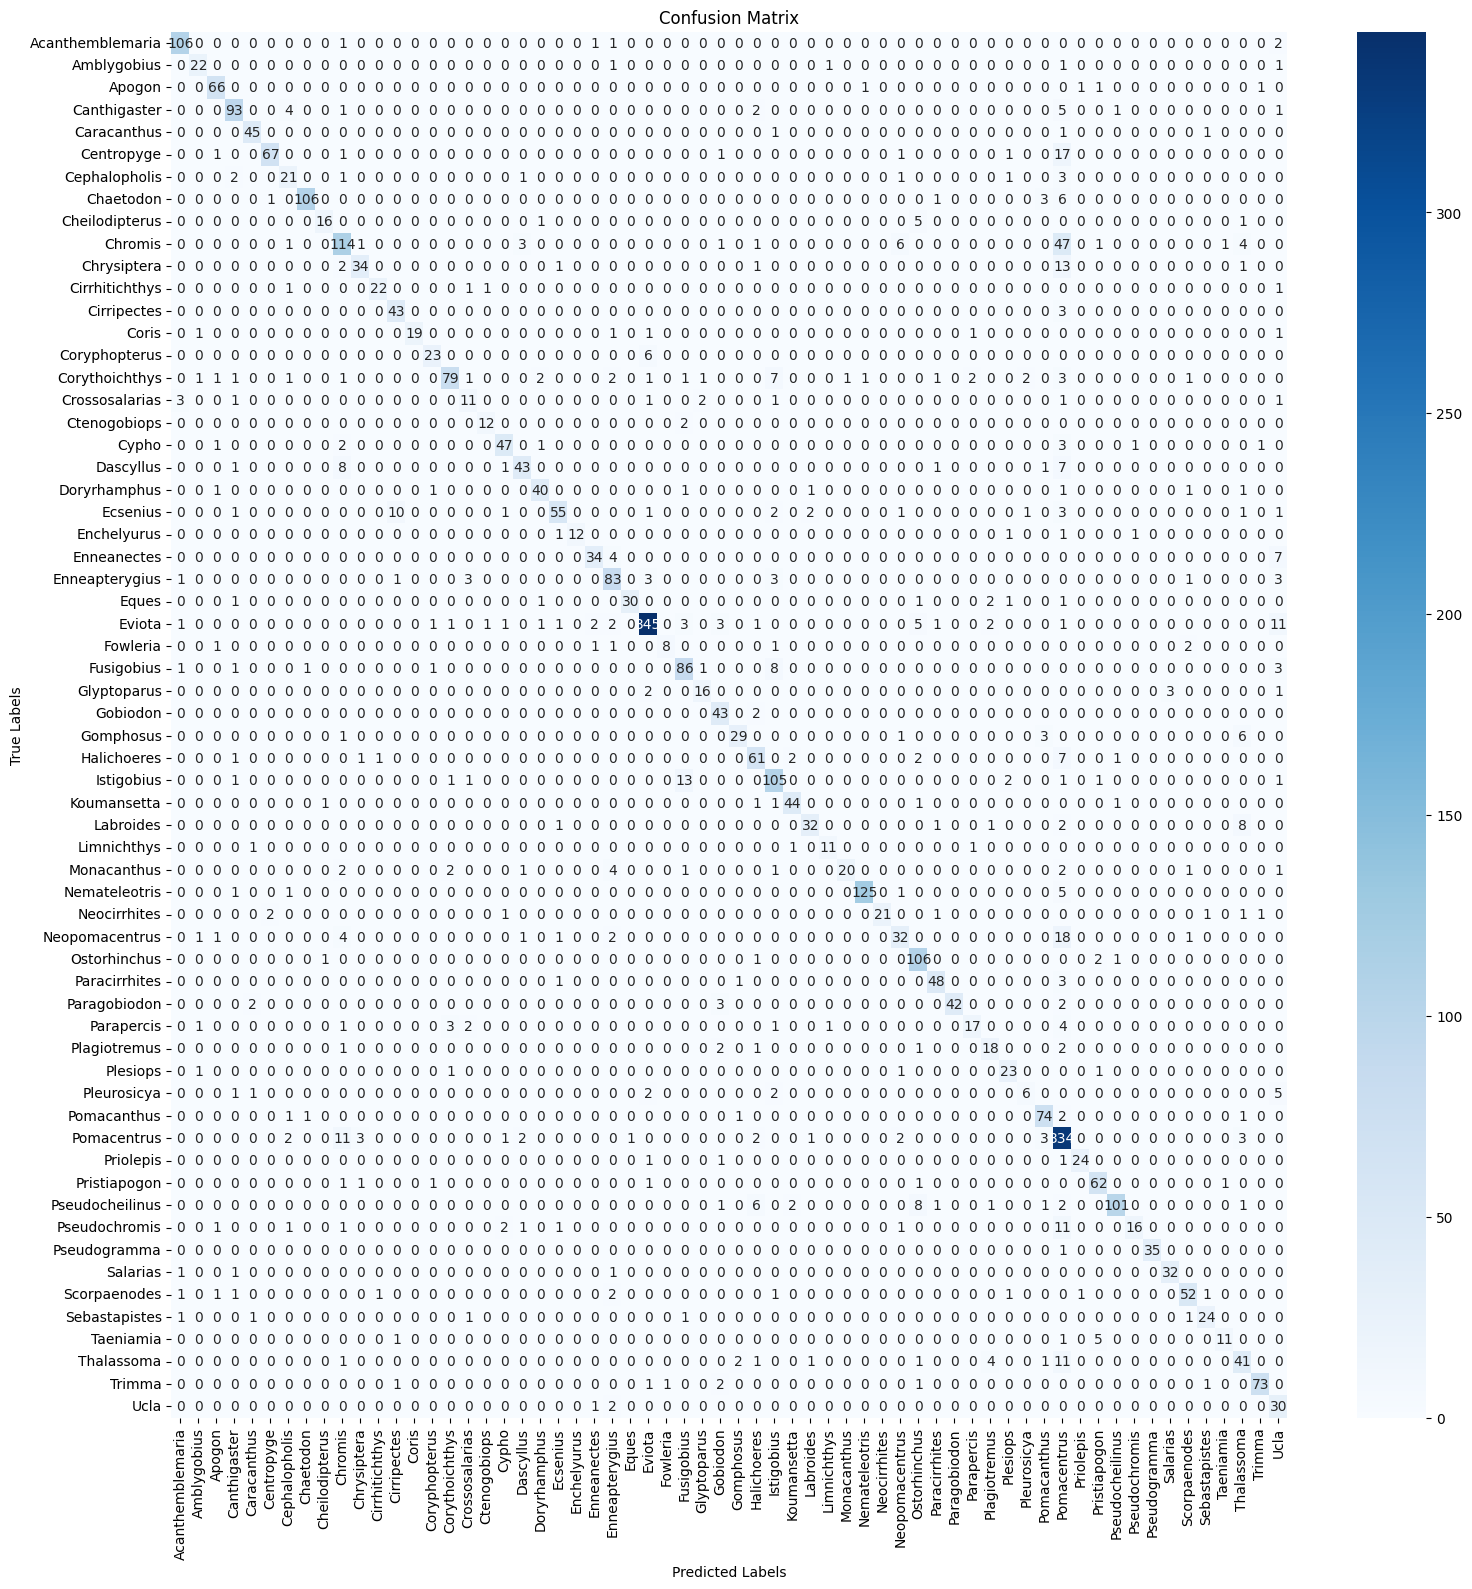

In [42]:
import seaborn as sns

labels = sorted(test_df[taxon].unique())
cm = confusion_matrix(test_df[taxon], test_df[f'{taxon}_pred'], labels=labels)

plt.figure(figsize=(18, 18))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

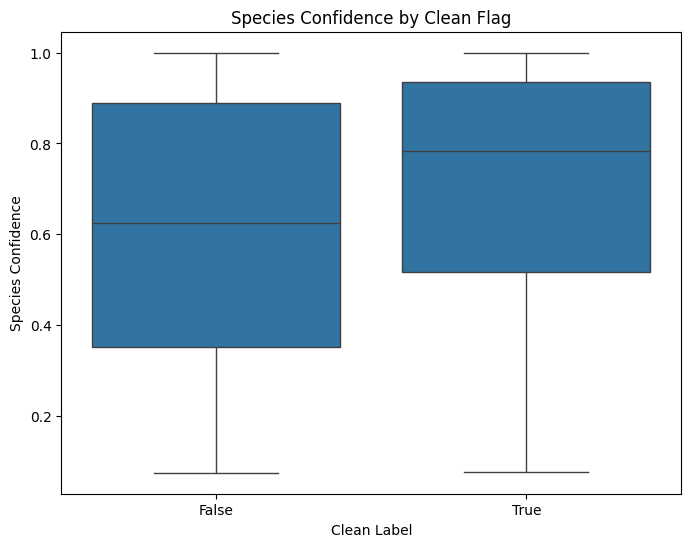

In [44]:
# a. Visualize distribution of confidence for clean vs. non-clean samples.
plt.figure(figsize=(8, 6))
sns.boxplot(x='clean', y='species_conf', data=test_df)
plt.title('Species Confidence by Clean Flag')
plt.xlabel('Clean Label')
plt.ylabel('Species Confidence')
plt.show()

In [45]:
# b. Compare the average confidence between clean and not-clean samples.
mean_conf_by_clean = test_df.groupby('clean')['species_conf'].mean()
print("Mean Species Confidence by Clean Flag:")
print(mean_conf_by_clean)

Mean Species Confidence by Clean Flag:
clean
False    0.611365
True     0.710227
Name: species_conf, dtype: float64


In [46]:
from scipy import stats

# c. Perform a statistical test (Point-Biserial Correlation)
#    since 'clean' is binary (True/False) and species_conf is continuous.
#    Convert the boolean flag to integer (True=1, False=0).
r, p_value = stats.pointbiserialr(test_df['clean'].astype(int), test_df['species_conf'])
print(f"\nPoint-Biserial Correlation: r = {r:.3f}, p-value = {p_value:.3f}")


Point-Biserial Correlation: r = 0.176, p-value = 0.000


In [56]:
test_df['correct'] = test_df['species'] == test_df['species_pred']

accuracy_by_clean = test_df.groupby('clean')['correct'].mean()
print("Accuracy by Clean Flag:")
print(accuracy_by_clean)

Accuracy by Clean Flag:
clean
False    0.691114
True     0.826443
Name: correct, dtype: float64


In [57]:
# Average confidence by clean flag and prediction correctness
avg_confidence = test_df.groupby(['clean', 'correct'])['species_conf'].mean().reset_index()
print("\nAverage Confidence by Clean Flag and Correctness:")
print(avg_confidence)


Average Confidence by Clean Flag and Correctness:
   clean  correct  species_conf
0  False    False      0.357991
1  False     True      0.724608
2   True    False      0.404061
3   True     True      0.774523


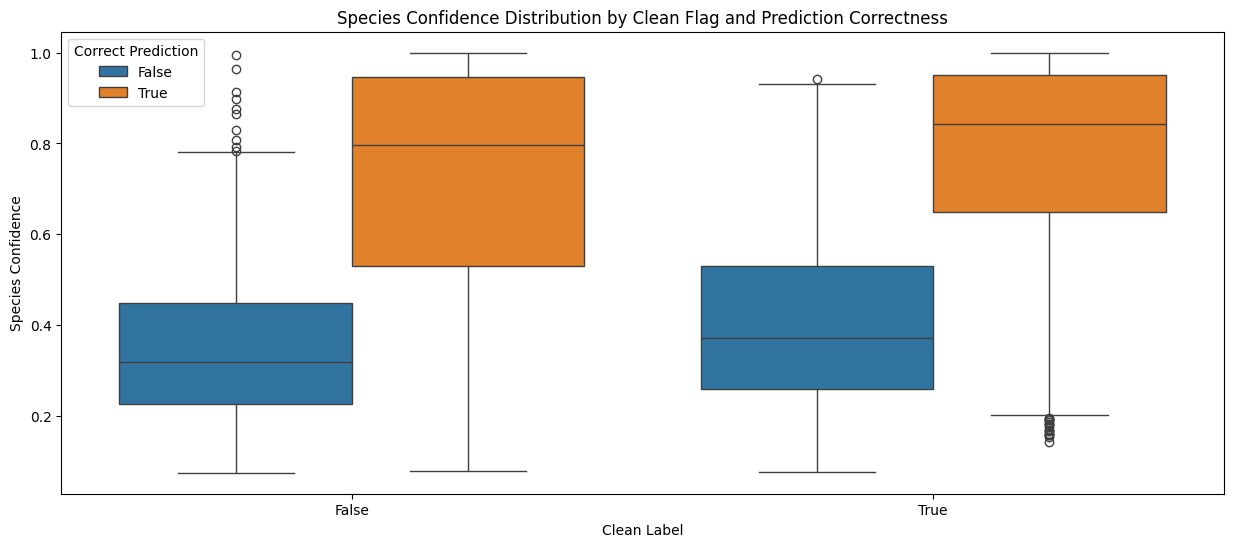

In [59]:
# Boxplot: Confidence Distribution for Correct and Incorrect Predictions, split by Clean Flag
plt.figure(figsize=(15, 6))
sns.boxplot(x='clean', y='species_conf', hue='correct', data=test_df)
plt.title('Species Confidence Distribution by Clean Flag and Prediction Correctness')
plt.xlabel('Clean Label')
plt.ylabel('Species Confidence')
plt.legend(title='Correct Prediction', loc='upper left')
plt.show()

In [62]:
import pandas as pd
from sklearn.metrics import precision_score

# Assuming your DataFrame 'df' has the following columns:
# 'species': true labels
# 'species_pred': predicted labels
# 'clean': boolean flag (True for clean, False for non-clean)

# Calculate precision for non-clean samples (macro-average, change as needed)
precision_non_clean = precision_score(
    test_df[test_df['clean'] == False]['species'],
    test_df[test_df['clean'] == False]['species_pred'],
    average='macro'
)

# Calculate precision for clean samples
precision_clean = precision_score(
    test_df[test_df['clean'] == True]['species'],
    test_df[test_df['clean'] == True]['species_pred'],
    average='macro'
)

# Compute the gain in precision
absolute_gain_precision = precision_clean - precision_non_clean
relative_gain_precision = (absolute_gain_precision / precision_non_clean) * 100

print(f"Precision on non-clean data: {precision_non_clean:.3f}")
print(f"Precision on clean data: {precision_clean:.3f}")
print(f"Absolute gain in precision: {absolute_gain_precision:.3f} (or {absolute_gain_precision*100:.2f} percentage points)")
print(f"Relative gain in precision: {relative_gain_precision:.2f}%")


Precision on non-clean data: 0.324
Precision on clean data: 0.633
Absolute gain in precision: 0.308 (or 30.83 percentage points)
Relative gain in precision: 95.03%


In [63]:
import pandas as pd
from sklearn.metrics import accuracy_score


# Calculate accuracy for clean and non-clean samples
df_clean = test_df[test_df['clean'] == True]
df_non_clean = test_df[test_df['clean'] == False]

accuracy_clean = accuracy_score(df_clean['species'], df_clean['species_pred'])
accuracy_non_clean = accuracy_score(df_non_clean['species'], df_non_clean['species_pred'])

# Calculate absolute gain in accuracy (difference between clean and non-clean)
absolute_gain_accuracy = accuracy_clean - accuracy_non_clean

# Calculate relative gain in accuracy (how much percent we gain compared to non-clean)
relative_gain_accuracy = (absolute_gain_accuracy / accuracy_non_clean) * 100

print(f"Accuracy on non-clean data: {accuracy_non_clean:.4f}")
print(f"Accuracy on clean data: {accuracy_clean:.4f}")
print(f"Absolute gain in accuracy: {absolute_gain_accuracy:.4f} (or {absolute_gain_accuracy*100:.2f} percentage points)")
print(f"Relative gain in accuracy: {relative_gain_accuracy:.2f}%")


Accuracy on non-clean data: 0.6911
Accuracy on clean data: 0.8264
Absolute gain in accuracy: 0.1353 (or 13.53 percentage points)
Relative gain in accuracy: 19.58%


In [27]:
test_df[[
    'hash', 
    #'family', 
    #'genus', 
    'species', 
    #'family_pred',
    #'genus_pred',
    'species_pred'
]].head(15)

,hash,species,species_pred
0,d03c9f608e3d7cc2,Nemateleotris magnifica,Nemateleotris magnifica
1,cf6827735a92191d,Pristiapogon exostigma,Pristiapogon exostigma
2,f512c16c3e91e14f,Scorpaenodes caribbaeus,Scorpaenodes caribbaeus
3,b926c17b94e1366a,Centropyge flavissima,Centropyge flavissima
4,deac398bca273c90,Chrysiptera rollandi,Pomacentrus brachialis
5,9f8fc0a53f98c027,Acanthemblemaria spinosa,Acanthemblemaria spinosa
6,e61bf0668c39c2ce,Pomacentrus lepidogenys,Pomacentrus lepidogenys
7,e9152e56b2558e55,Pseudocheilinus hexataenia,Thalassoma amblycephalum
8,bf87c0703f87e038,Eviota albolineata,Eviota albolineata
9,bb4cc7d0983d66c4,Chaetodon quadrimaculatus,Centropyge bispinosa


In [53]:
test_df.values[2462]

array(['/Volumes/T7_shield/CryptoVision/Data/Images/Sources/Web/Species/v240712/uniques/Syngnathidae_Corythoichthys_flavofasciatus/web_Corythoichthys_flavofasciatus_0061.jpeg',
       'Syngnathidae_Corythoichthys_flavofasciatus', 'Syngnathidae',
       'Corythoichthys', 'Corythoichthys flavofasciatus', 'web',
       'd17f4f60e5823f08', 500, 409, 1.22, 'JPEG', 'RGB', 144629, 149.69,
       37.7, 8.79489, 61.1, '(152, 157, 139)', False, False, False,
       'Syngnathidae', 0.826171875, 'Corythoichthys', 0.8173828125,
       'Corythoichthys flavofasciatus', 0.67236328125, True], dtype=object)

2462
True Label: Fam Syngnathidae | Gen: Corythoichthys | Spec: Corythoichthys flavofasciatus
Pred Clean: Fam Syngnathidae | Gen: Corythoichthys | Spec: Corythoichthys flavofasciatus - Confidence: (0.765, 0.7876, 0.6426)


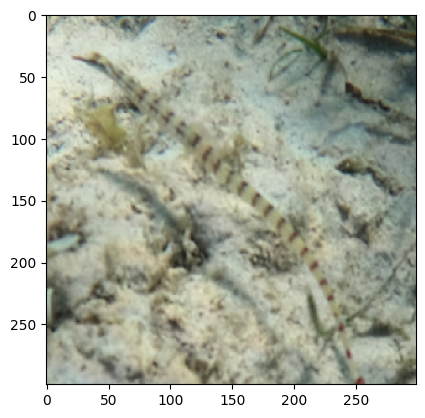

In [52]:
sample = test_df.sample(1)

for row, data in sample.iterrows():
    
    print(row)
    print(f"True Label: Fam {data['family']} | Gen: {data['genus']} | Spec: {data['species']}")
    
    #preds_og = ai_og.predict(data['image_path'])
    preds = ai.predict(data['image_path'])
    
    #print(f"Pred OG:    Fam {preds_og[0]} | Gen: {preds_og[1]} | Spec: {preds_og[2]} [Confidence: {ai_og.confidence}]")
    print(f"Pred Clean: Fam {preds[0]} | Gen: {preds[1]} | Spec: {preds[2]} - Confidence: {ai.confidence}")
    
plt.imshow(ai.image)
plt.show()



In [246]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

all_fam_true = []
all_fam_pred = []
all_fam_conf = []

for batch in test_ds:
    images, labels = batch
    
    fam_true = tf.argmax(labels['family'], axis=1).numpy()
    preds = ai.model.predict(images, verbose=0)
    
    fam_pred = tf.argmax(preds[0], axis=1)
    fam_conf = tf.reduce_max(preds[0], axis=1)
    
    all_fam_true.extend(fam_true)
    all_fam_pred.extend(fam_pred.numpy())
    all_fam_conf.extend(fam_conf.numpy())
    

2025-02-12 18:08:44.659600: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [251]:
ai.predict(test_ds)

2025-02-12 18:34:15.860660: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


[('Pomacentridae', 'Pomacentrus', 'Pomacentrus amboinensis'),
 ('Tripterygiidae', 'Ucla', 'Fusigobius duospilus'),
 ('Blenniidae', 'Plagiotremus', 'Plagiotremus rhinorhynchus'),
 ('Plesiopidae', 'Plesiops', 'Plesiops coeruleolineatus'),
 ('Pomacanthidae', 'Centropyge', 'Centropyge flavissima'),
 ('Syngnathidae', 'Doryrhamphus', 'Doryrhamphus excisus'),
 ('Blenniidae', 'Cirripectes', 'Cirripectes variolosus'),
 ('Labridae', 'Caracanthus', 'Caracanthus maculatus'),
 ('Tetraodontidae', 'Canthigaster', 'Canthigaster solandri'),
 ('Pomacentridae', 'Pomacentrus', 'Pomacentrus pavo'),
 ('Blenniidae', 'Cirripectes', 'Cirripectes variolosus'),
 ('Pomacentridae', 'Pomacentrus', 'Pomacentrus brachialis'),
 ('Chaetodontidae', 'Chaetodon', 'Chaetodon quadrimaculatus'),
 ('Gobiidae', 'Eviota', 'Eviota atriventris'),
 ('Pomacentridae', 'Pomacentrus', 'Pomacentrus nagasakiensis'),
 ('Labridae', 'Pseudocheilinus', 'Pseudocheilinus hexataenia'),
 ('Apogonidae', 'Ostorhinchus', 'Cheilodipterus quinquelin

In [243]:
def decoder(labels_list, idx_list):
    return [labels_list[i] for i in idx_list]

In [250]:
fam_decoded = decoder(labels['family'], all_fam_pred)
fam_decoded

['Pinguipedidae',
 'Pomacentridae',
 'Tetraodontidae',
 'Pomacanthidae',
 'Scorpaenidae',
 'Blenniidae',
 'Pomacentridae',
 'Blenniidae',
 'Chaenopsidae',
 'Labridae',
 'Gobiidae',
 'Gobiidae',
 'Pomacentridae',
 'Blenniidae',
 'Pseudochromidae',
 'Gobiidae',
 'Pomacentridae',
 'Tetraodontidae',
 'Labridae',
 'Gobiidae',
 'Labridae',
 'Labridae',
 'Gobiidae',
 'Tripterygiidae',
 'Chaetodontidae',
 'Labridae',
 'Pomacentridae',
 'Tripterygiidae',
 'Chaetodontidae',
 'Pomacentridae',
 'Pomacentridae',
 'Pomacentridae',
 'Pomacentridae',
 'Cirrhitidae',
 'Apogonidae',
 'Chaetodontidae',
 'Pomacentridae',
 'Pomacentridae',
 'Monacanthidae',
 'Pomacentridae',
 'Blenniidae',
 'Pomacanthidae',
 'Syngnathidae',
 'Gobiidae',
 'Pomacentridae',
 'Gobiidae',
 'Apogonidae',
 'Pomacentridae',
 'Gobiidae',
 'Creediidae',
 'Gobiidae',
 'Gobiidae',
 'Gobiidae',
 'Apogonidae',
 'Gobiidae',
 'Blenniidae',
 'Gobiidae',
 'Monacanthidae',
 'Scorpaenidae',
 'Gobiidae',
 'Gobiidae',
 'Pinguipedidae',
 'Gobiid

In [142]:
predictions_og = {
    'fam_pred': [],
    'gen_pred': [],
    'spe_pred': [],
    'fam_conf': [],
    'gen_conf': [],
    'spe_conf': [],
}

for row, data in tqdm(test_df.iterrows(), total=test_df.shape[0]):
    
    preds = ai_og.predict(data['image_path'])
    predictions_og['fam_pred'].append(preds[0])
    predictions_og['gen_pred'].append(preds[1])
    predictions_og['spe_pred'].append(preds[2])

    predictions_og['fam_conf'].append(ai.confidence[0])
    predictions_og['gen_conf'].append(ai.confidence[1])
    predictions_og['spe_conf'].append(ai.confidence[2])

100%|██████████| 4258/4258 [04:40<00:00, 15.20it/s]


In [143]:

print(sum(predictions_og['spe_conf']) / len(predictions_og['spe_conf']))
print(sum(predictions['spe_conf']) / len(predictions['spe_conf']))

0.6396484375
0.6299725017843251


In [147]:
from sklearn.metrics import accuracy_score, average_precision_score


print('Accuracy OG:', accuracy_score(test_df['species'], predictions_og['spe_pred']))
print('Accuracy CL:', accuracy_score(test_df['species'], predictions['spe_pred']))

Accuracy OG: 0.7235791451385627
Accuracy CL: 0.7350868952559887


In [148]:
test_df.columns

Index(['image_path', 'folder_label', 'family', 'genus', 'species', 'source',
       'hash', 'width', 'height', 'aspect_ratio', 'format', 'mode',
       'file_size', 'brightness', 'contrast', 'entropy', 'blur_score',
       'dominant_color', 'flag_small', 'duplicates', 'source_path'],
      dtype='object')

In [154]:
df_rst = test_df.copy()

df_rst.reset_index(inplace=True, drop=True)

for key in predictions_og.keys():
    df_rst[f"{key}_og"] = predictions_og[key]
    
for key in predictions.keys():
    df_rst[key] = predictions[key]

df_rst.head(10)

,image_path,folder_label,family,genus,species,source,hash,width,height,aspect_ratio,...,spe_pred_og,fam_conf_og,gen_conf_og,spe_conf_og,fam_pred,gen_pred,spe_pred,fam_conf,gen_conf,spe_conf
0,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Gobiidae_Eviota_atriventris,Gobiidae,Eviota,Eviota atriventris,inat,8d1a2e3978d3d30e,700,701,1.00,...,Eviota atriventris,0.862793,0.858887,0.639648,Gobiidae,Eviota,Eviota atriventris,0.762695,0.883789,0.991699
1,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Gobiidae_Nemateleotris_magnifica,Gobiidae,Nemateleotris,Nemateleotris magnifica,inat,ac61c0369d4e673b,1500,1000,1.50,...,Nemateleotris magnifica,0.862793,0.858887,0.639648,Gobiidae,Nemateleotris,Nemateleotris magnifica,0.778809,0.910645,0.886719
2,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Gobiidae_Istigobius_decoratus,Gobiidae,Istigobius,Istigobius decoratus,web,d4c74e38676c18b3,500,333,1.50,...,Istigobius decoratus,0.862793,0.858887,0.639648,Gobiidae,Istigobius,Istigobius decoratus,0.528320,0.607422,0.608398
3,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Labridae_Pseudocheilinus_hexataenia,Labridae,Pseudocheilinus,Pseudocheilinus hexataenia,sjb,ea3787c21b4f0f30,4288,2848,1.51,...,Pseudocheilinus hexataenia,0.862793,0.858887,0.639648,Labridae,Pseudocheilinus,Pseudocheilinus hexataenia,0.965332,0.987793,0.691406
4,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Pomacentridae_Chromis_margaritifer,Pomacentridae,Chromis,Chromis margaritifer,inat,a3dc3e32e8259e16,880,495,1.78,...,Gomphosus varius,0.862793,0.858887,0.639648,Pomacanthidae,Gomphosus,Pomacanthus maculosus,0.290039,0.373535,0.379639
5,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Gobiidae_Gobiodon_quinquestrigatus,Gobiidae,Gobiodon,Gobiodon quinquestrigatus,sjb,e2b195ce6ab434c3,4288,2848,1.51,...,Gobiodon quinquestrigatus,0.862793,0.858887,0.639648,Gobiidae,Gobiodon,Gobiodon quinquestrigatus,0.894531,0.860840,0.750977
6,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Chaenopsidae_Acanthemblemaria_aspera,Chaenopsidae,Acanthemblemaria,Acanthemblemaria aspera,cbc,807cc7c73038cfc7,6240,4160,1.50,...,Acanthemblemaria aspera,0.862793,0.858887,0.639648,Chaenopsidae,Acanthemblemaria,Acanthemblemaria aspera,0.974609,0.911133,0.981445
7,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Pomacentridae_Pomacentrus_amboinensis,Pomacentridae,Pomacentrus,Pomacentrus amboinensis,web,d3de346c9a606d4c,1503,1052,1.43,...,Pomacentrus amboinensis,0.862793,0.858887,0.639648,Pomacentridae,Pomacentrus,Pomacentrus amboinensis,0.855469,0.816406,0.698730
8,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Gobbidae_Eviota_distigma,Gobbidae,Eviota,Eviota distigma,scls,be1bc1663e9bc064,4288,2848,1.51,...,Eviota distigma,0.862793,0.858887,0.639648,Gobiidae,Eviota,Eviota distigma,0.448486,0.789551,0.702637
9,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Chaenopsidae_Acanthemblemaria_aspera,Chaenopsidae,Acanthemblemaria,Acanthemblemaria aspera,web,9e81e32b5a3b0ec6,1200,800,1.50,...,Acanthemblemaria aspera,0.862793,0.858887,0.639648,Chaenopsidae,Acanthemblemaria,Acanthemblemaria aspera,0.979492,0.969238,0.885742


In [202]:
df_rst[df_rst['species'] == df_rst['spe_pred']].head(10)

,image_path,folder_label,family,genus,species,source,hash,width,height,aspect_ratio,...,spe_pred_og,fam_conf_og,gen_conf_og,spe_conf_og,fam_pred,gen_pred,spe_pred,fam_conf,gen_conf,spe_conf
0,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Gobiidae_Eviota_atriventris,Gobiidae,Eviota,Eviota atriventris,inat,8d1a2e3978d3d30e,700,701,1.00,...,Eviota atriventris,0.862793,0.858887,0.639648,Gobiidae,Eviota,Eviota atriventris,0.762695,0.883789,0.991699
1,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Gobiidae_Nemateleotris_magnifica,Gobiidae,Nemateleotris,Nemateleotris magnifica,inat,ac61c0369d4e673b,1500,1000,1.50,...,Nemateleotris magnifica,0.862793,0.858887,0.639648,Gobiidae,Nemateleotris,Nemateleotris magnifica,0.778809,0.910645,0.886719
2,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Gobiidae_Istigobius_decoratus,Gobiidae,Istigobius,Istigobius decoratus,web,d4c74e38676c18b3,500,333,1.50,...,Istigobius decoratus,0.862793,0.858887,0.639648,Gobiidae,Istigobius,Istigobius decoratus,0.528320,0.607422,0.608398
3,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Labridae_Pseudocheilinus_hexataenia,Labridae,Pseudocheilinus,Pseudocheilinus hexataenia,sjb,ea3787c21b4f0f30,4288,2848,1.51,...,Pseudocheilinus hexataenia,0.862793,0.858887,0.639648,Labridae,Pseudocheilinus,Pseudocheilinus hexataenia,0.965332,0.987793,0.691406
5,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Gobiidae_Gobiodon_quinquestrigatus,Gobiidae,Gobiodon,Gobiodon quinquestrigatus,sjb,e2b195ce6ab434c3,4288,2848,1.51,...,Gobiodon quinquestrigatus,0.862793,0.858887,0.639648,Gobiidae,Gobiodon,Gobiodon quinquestrigatus,0.894531,0.860840,0.750977
6,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Chaenopsidae_Acanthemblemaria_aspera,Chaenopsidae,Acanthemblemaria,Acanthemblemaria aspera,cbc,807cc7c73038cfc7,6240,4160,1.50,...,Acanthemblemaria aspera,0.862793,0.858887,0.639648,Chaenopsidae,Acanthemblemaria,Acanthemblemaria aspera,0.974609,0.911133,0.981445
7,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Pomacentridae_Pomacentrus_amboinensis,Pomacentridae,Pomacentrus,Pomacentrus amboinensis,web,d3de346c9a606d4c,1503,1052,1.43,...,Pomacentrus amboinensis,0.862793,0.858887,0.639648,Pomacentridae,Pomacentrus,Pomacentrus amboinensis,0.855469,0.816406,0.698730
8,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Gobbidae_Eviota_distigma,Gobbidae,Eviota,Eviota distigma,scls,be1bc1663e9bc064,4288,2848,1.51,...,Eviota distigma,0.862793,0.858887,0.639648,Gobiidae,Eviota,Eviota distigma,0.448486,0.789551,0.702637
9,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Chaenopsidae_Acanthemblemaria_aspera,Chaenopsidae,Acanthemblemaria,Acanthemblemaria aspera,web,9e81e32b5a3b0ec6,1200,800,1.50,...,Acanthemblemaria aspera,0.862793,0.858887,0.639648,Chaenopsidae,Acanthemblemaria,Acanthemblemaria aspera,0.979492,0.969238,0.885742
10,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Syngnathidae_Corythoichthys_flavofasciatus,Syngnathidae,Corythoichthys,Corythoichthys flavofasciatus,web,95353774570a791a,382,500,0.76,...,Enneapterygius tutuilae,0.862793,0.858887,0.639648,Syngnathidae,Corythoichthys,Corythoichthys flavofasciatus,0.228516,0.238770,0.163208


In [83]:
for key in predictions.keys():
    test_df[key] = predictions[key]

In [85]:
test_df.reset_index(inplace=True)
test_df.head()

,index,image_path,folder_label,family,genus,species,source,hash,width,height,...,dominant_color,flag_small,duplicates,source_path,fam_pred,gen_pred,spe_pred,fam_conf,gen_conf,spe_conf
0,11302,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Gobiidae_Eviota_atriventris,Gobiidae,Eviota,Eviota atriventris,inat,8d1a2e3978d3d30e,700,701,...,"(51, 61, 53)",False,False,Sources/INaturaList/Species/v250128/images,Gobiidae,Eviota,Eviota atriventris,0.356934,0.533203,0.861816
1,13386,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Gobiidae_Nemateleotris_magnifica,Gobiidae,Nemateleotris,Nemateleotris magnifica,inat,ac61c0369d4e673b,1500,1000,...,"(119, 130, 118)",False,False,Sources/INaturaList/Species/v250128/images,Gobiidae,Nemateleotris,Nemateleotris magnifica,0.862793,0.917969,0.890625
2,24074,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Gobiidae_Istigobius_decoratus,Gobiidae,Istigobius,Istigobius decoratus,web,d4c74e38676c18b3,500,333,...,"(154, 162, 148)",False,False,Sources/Web/Species/v240712/uniques,Gobiidae,Istigobius,Istigobius decoratus,0.506836,0.647461,0.393555
3,4072,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Labridae_Pseudocheilinus_hexataenia,Labridae,Pseudocheilinus,Pseudocheilinus hexataenia,sjb,ea3787c21b4f0f30,4288,2848,...,"(146, 144, 134)",False,False,Sources/Lab/SJB/Processed/Species/v241226/uniques,Labridae,Pseudocheilinus,Pseudocheilinus hexataenia,0.965332,0.983398,0.692383
4,17052,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Pomacentridae_Chromis_margaritifer,Pomacentridae,Chromis,Chromis margaritifer,inat,a3dc3e32e8259e16,880,495,...,"(133, 162, 168)",False,False,Sources/INaturaList/Species/v250128/images,Labridae,Pomacanthus,Pomacanthus maculosus,0.412842,0.337402,0.374512


In [99]:
test_correct = test_df[test_df['species'] == test_df['spe_pred']]

test_correct.head(20)

,index,image_path,folder_label,family,genus,species,source,hash,width,height,...,dominant_color,flag_small,duplicates,source_path,fam_pred,gen_pred,spe_pred,fam_conf,gen_conf,spe_conf
0,11302,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Gobiidae_Eviota_atriventris,Gobiidae,Eviota,Eviota atriventris,inat,8d1a2e3978d3d30e,700,701,...,"(51, 61, 53)",False,False,Sources/INaturaList/Species/v250128/images,Gobiidae,Eviota,Eviota atriventris,0.356934,0.533203,0.861816
1,13386,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Gobiidae_Nemateleotris_magnifica,Gobiidae,Nemateleotris,Nemateleotris magnifica,inat,ac61c0369d4e673b,1500,1000,...,"(119, 130, 118)",False,False,Sources/INaturaList/Species/v250128/images,Gobiidae,Nemateleotris,Nemateleotris magnifica,0.862793,0.917969,0.890625
2,24074,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Gobiidae_Istigobius_decoratus,Gobiidae,Istigobius,Istigobius decoratus,web,d4c74e38676c18b3,500,333,...,"(154, 162, 148)",False,False,Sources/Web/Species/v240712/uniques,Gobiidae,Istigobius,Istigobius decoratus,0.506836,0.647461,0.393555
3,4072,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Labridae_Pseudocheilinus_hexataenia,Labridae,Pseudocheilinus,Pseudocheilinus hexataenia,sjb,ea3787c21b4f0f30,4288,2848,...,"(146, 144, 134)",False,False,Sources/Lab/SJB/Processed/Species/v241226/uniques,Labridae,Pseudocheilinus,Pseudocheilinus hexataenia,0.965332,0.983398,0.692383
5,2974,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Gobiidae_Gobiodon_quinquestrigatus,Gobiidae,Gobiodon,Gobiodon quinquestrigatus,sjb,e2b195ce6ab434c3,4288,2848,...,"(204, 201, 202)",False,False,Sources/Lab/SJB/Processed/Species/v241226/uniques,Gobiidae,Gobiodon,Gobiodon quinquestrigatus,0.820801,0.802246,0.518066
6,7326,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Chaenopsidae_Acanthemblemaria_aspera,Chaenopsidae,Acanthemblemaria,Acanthemblemaria aspera,cbc,807cc7c73038cfc7,6240,4160,...,"(217, 215, 210)",False,False,Sources/Lab/CBC24/Processed/Species/v250115/im...,Chaenopsidae,Acanthemblemaria,Acanthemblemaria aspera,0.963379,0.839844,0.965820
7,26842,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Pomacentridae_Pomacentrus_amboinensis,Pomacentridae,Pomacentrus,Pomacentrus amboinensis,web,d3de346c9a606d4c,1503,1052,...,"(104, 99, 79)",False,False,Sources/Web/Species/v240712/uniques,Pomacentridae,Pomacentrus,Pomacentrus amboinensis,0.784180,0.808105,0.788574
8,6698,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Gobbidae_Eviota_distigma,Gobbidae,Eviota,Eviota distigma,scls,be1bc1663e9bc064,4288,2848,...,"(169, 196, 217)",False,False,Sources/Lab/SCLS/Processed/Species/v250115/images,Gobiidae,Eviota,Eviota distigma,0.515137,0.778809,0.670898
9,22685,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Chaenopsidae_Acanthemblemaria_aspera,Chaenopsidae,Acanthemblemaria,Acanthemblemaria aspera,web,9e81e32b5a3b0ec6,1200,800,...,"(135, 98, 75)",False,False,Sources/Web/Species/v240712/uniques,Chaenopsidae,Acanthemblemaria,Acanthemblemaria aspera,0.966797,0.924805,0.843262
10,27452,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Syngnathidae_Corythoichthys_flavofasciatus,Syngnathidae,Corythoichthys,Corythoichthys flavofasciatus,web,95353774570a791a,382,500,...,"(167, 151, 102)",False,False,Sources/Web/Species/v240712/uniques,Gobiidae,Eviota,Corythoichthys flavofasciatus,0.277344,0.205444,0.100708


<Axes: xlabel='family', ylabel='fam_conf'>

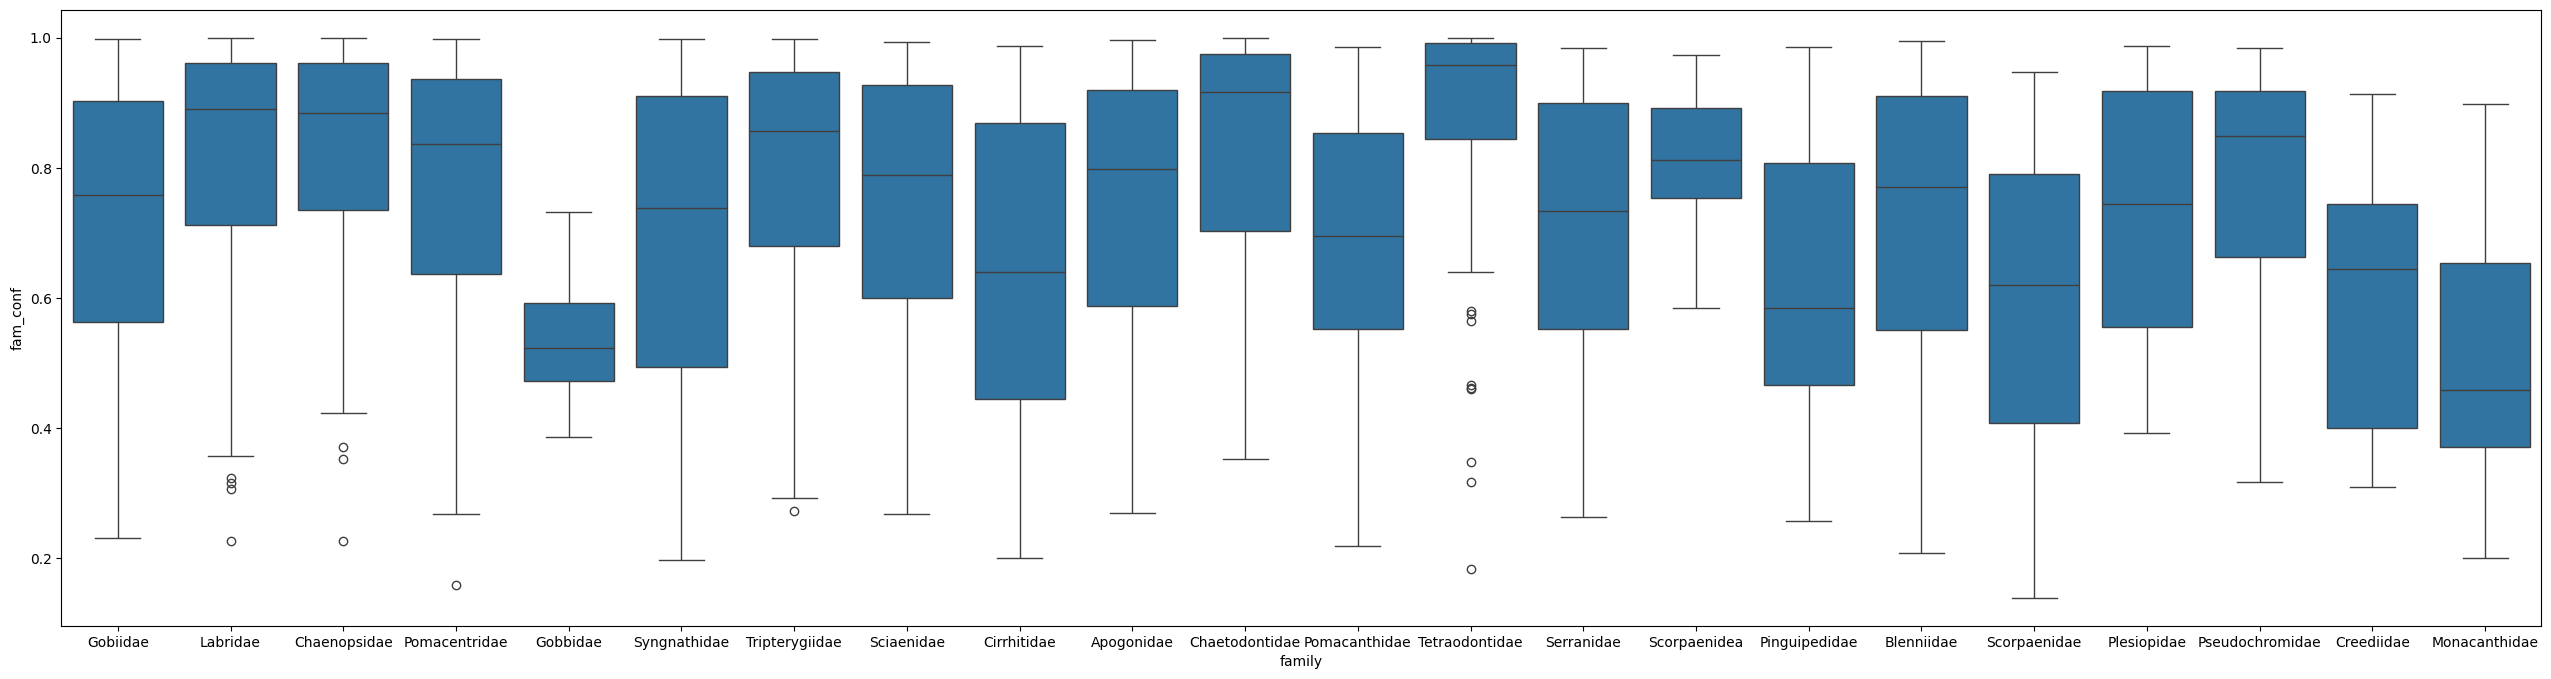

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(32, 8))
sns.boxplot(x='family', y='fam_conf', data=test_correct)

<Axes: >

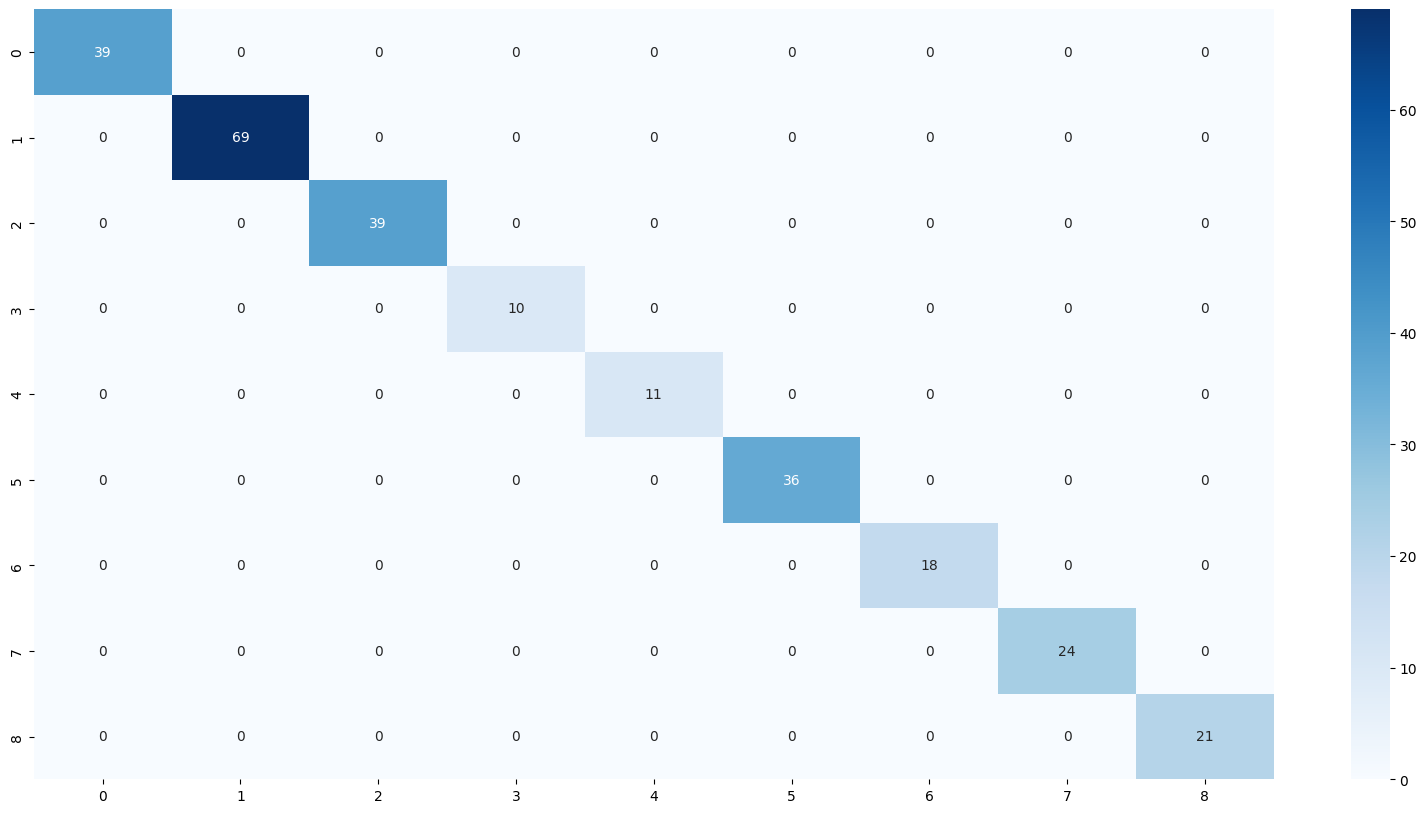

In [102]:
from sklearn.metrics import classification_report, confusion_matrix

eviotas = test_correct[test_correct['genus'] == 'Eviota']

conf_mtx = confusion_matrix(eviotas['species'], eviotas['spe_pred'])

plt.figure(figsize=(20, 10))
sns.heatmap(conf_mtx, annot=True, fmt='d', cmap='Blues')

<Axes: xlabel='species', ylabel='spe_conf'>

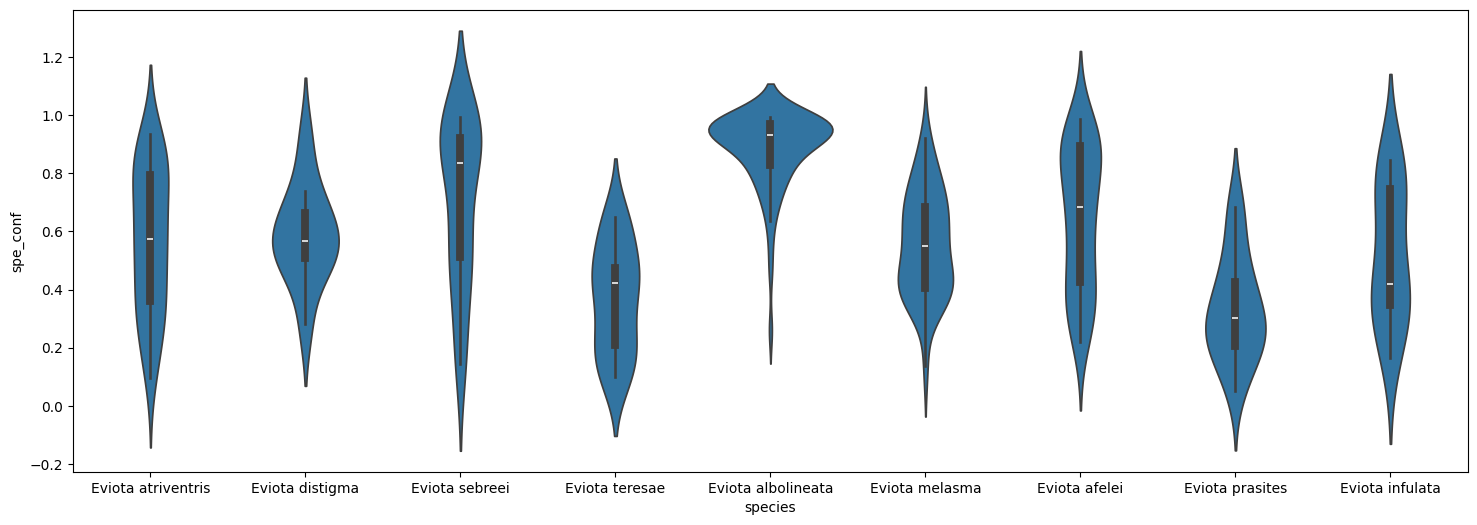

In [109]:
plt.figure(figsize=(18, 6))
sns.violinplot(x='species', y='spe_conf', data=eviotas)

In [114]:
report = classification_report(test_df['species'], test_df['spe_pred'], target_names=labels['species'], output_dict=True)
print(report)

{'Acanthemblemaria aspera': {'precision': 0.4797297297297297, 'recall': 0.9102564102564102, 'f1-score': 0.6283185840707964, 'support': 78.0}, 'Acanthemblemaria spinosa': {'precision': 0.6129032258064516, 'recall': 0.5757575757575758, 'f1-score': 0.59375, 'support': 33.0}, 'Amblygobius phalaena': {'precision': 0.6111111111111112, 'recall': 0.4230769230769231, 'f1-score': 0.5, 'support': 26.0}, 'Apogon binotatus': {'precision': 0.7297297297297297, 'recall': 0.9310344827586207, 'f1-score': 0.8181818181818182, 'support': 29.0}, 'Apogon maculatus': {'precision': 0.8157894736842105, 'recall': 0.6888888888888889, 'f1-score': 0.7469879518072289, 'support': 45.0}, 'Canthigaster solandri': {'precision': 0.6690647482014388, 'recall': 0.8532110091743119, 'f1-score': 0.75, 'support': 109.0}, 'Caracanthus maculatus': {'precision': 0.6857142857142857, 'recall': 0.8275862068965517, 'f1-score': 0.75, 'support': 29.0}, 'Caracanthus unipinna': {'precision': 0.9285714285714286, 'recall': 0.684210526315789

/Users/leonardo/miniconda3/envs/cvenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/leonardo/miniconda3/envs/cvenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/leonardo/miniconda3/envs/cvenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

In [119]:
import pandas as pd

rpt = pd.DataFrame(report).transpose()

rpt = rpt.reset_index().rename(columns={'index':'species'})

rpt.head(10)

,species,precision,recall,f1-score,support
0,Acanthemblemaria aspera,0.479730,0.910256,0.628319,78.0
1,Acanthemblemaria spinosa,0.612903,0.575758,0.593750,33.0
2,Amblygobius phalaena,0.611111,0.423077,0.500000,26.0
3,Apogon binotatus,0.729730,0.931034,0.818182,29.0
4,Apogon maculatus,0.815789,0.688889,0.746988,45.0
5,Canthigaster solandri,0.669065,0.853211,0.750000,109.0
6,Caracanthus maculatus,0.685714,0.827586,0.750000,29.0
7,Caracanthus unipinna,0.928571,0.684211,0.787879,19.0
8,Centropyge bispinosa,0.760000,0.730769,0.745098,52.0
9,Centropyge flavissima,0.891892,0.785714,0.835443,42.0


TypeError: matplotlib.axes._axes.Axes.bar() got multiple values for keyword argument 'x'

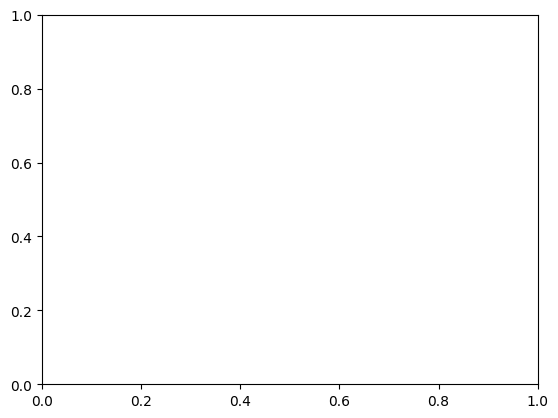

In [121]:
# bar plot species vs precision
import pandas as pd
import matplotlib.pyplot as plt

